In [2]:
class HashTable():
    
    def __init__(self, nBuckets, hashF):
        self.buckets = [None for i in range(nBuckets)]
        self.h = hashF
        self.collisions = 0
        
    def size(self):
        return len(self.buckets)
    
    def put(self, key, value):
        #num_key = int(key)
        chosen_bucket = self.h(key)
        
        numTried = 0
        
        while self.buckets[chosen_bucket] is not None:
            if self.buckets[chosen_bucket][0] == key:
                break
            else:
                chosen_bucket = (chosen_bucket+1) % len(self.buckets)
                self.collisions += 1
                numTried += 1
                
                if numTried > self.size():
                    print("Buckets full, doubling...")
                    self.reallocate(key,value)
                    return
                
        self.buckets[chosen_bucket] = (key, value)
    
    def get(self, key):
        #num_key = int(key)
        
        chosen_bucket = self.h(key)
        numTried = 0
        
        while self.buckets[chosen_bucket] is not None and self.buckets[chosen_bucket][0] != key:
            chosen_bucket = (chosen_bucket + 1) % len(self.buckets)
            numTried += 1
            
            if numTried > self.size():
                return None
        
        if self.buckets[chosen_bucket] is None:
            return None
            
        return self.buckets[chosen_bucket][1] 
        
    
    def reallocate(self, key, value):
        old_buckets = [item for item in self.buckets]
        self.buckets = [None for i in range(2*self.size())]
        
        for b_key, b_value in old_buckets:
            self.put(b_key, b_value)
            
        self.put(key,value)                      
                        
    
    # return true if the key exists in the table, otherwise return false
    def probe(self, key):
        #num_key = int(key)
        chosen_bucket = self.h(key)
        numTried = 0
        
        while self.buckets[chosen_bucket] is not None and self.buckets[chosen_bucket][0] != key:
            chosen_bucket = (chosen_bucket + 1) % len(self.buckets)
            numTried += 1
            
            if numTried > self.size():
                return False
            
        if self.buckets[chosen_bucket] is None:
            return False
        return True
    
# remove entry associated with a key
    def delete(self, key):
        #num_key = int(key)
        chosen_bucket = self.h(key)
        numTried = 0
        
        while self.buckets[chosen_bucket] is not None and self.buckets[chosen_bucket][0] != key:
            chosen_bucket = (chosen_bucket + 1) % len(self.buckets)
            numTried += 1
            
            if numTried > self.size():
                raise Exception("awkward..key doesn't exist!")
                
        if self.buckets[chosen_bucket] is not None:
            self.buckets.pop(chosen_bucket)
        
        else:
            raise Exception("awkward..key doesn't exist!")
    
    # return a list of all keys used
    def all_keys(self):
        all_keys = []
        for key in self.buckets:
            if key is not None:
                all_keys.append(key[0])
            
        return all_keys
    
    def get_colli_count(self):
        return self.collisions

In [3]:
def mod100(x):
    return int(x)%100

def mod5(x):
    return int(x)%5


In [4]:
import numpy as num
import random as rand
import matplotlib.pyplot as plot
import time

In [5]:
def generateRand():
    
    id_num = num.random.randint(low=0, high=10*10*10*10*10*10*10*10*10)
    name = ["dog","cat", "fish", "snake", "strawberry cow", "mule", "horse", "lion"]
    
    
    dob_month = num.random.randint( low=1, high=13 )
    dob_year = num.random.randint( low=1923, high=2024 )
    dob_day = num.random.randint( low=1, high=32 )
    
    dob_string = "%02d/%02d/%d" % (dob_month, dob_day, dob_year)
    
    
    return ("%010d" % id_num, (rand.choice(name),  dob_string  ))

In [6]:
def randomKeyValuePairs(n):
    key_value_list = []
    for i in range(n):
        n = generateRand()
        key_value_list.append(n)
        
    return key_value_list


def retrieveManyPairs(hashtable):
    all_key = hashtable.all_keys()
    for i in range(1000):
        key = (rand.choice(all_key))
        hashtable.get(key)

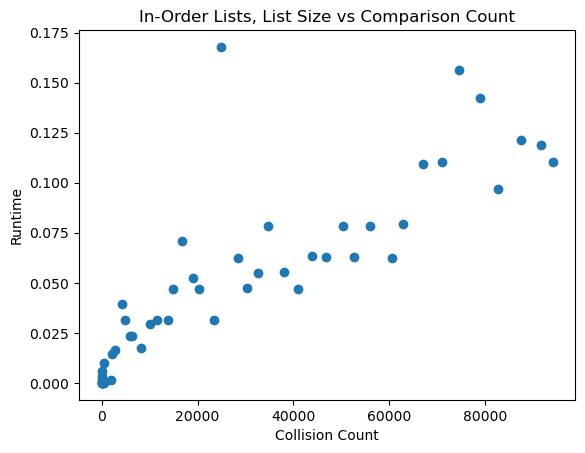

In [7]:
x_list = []
y_list = []

for i in range(1,50):
    random_key = randomKeyValuePairs(10*i)
    table = HashTable(500, mod100)
    for item in random_key:
        table.put(item[0], item[1])
        

    x_i = table.get_colli_count()
    x_list.append(x_i)
        
    start_time = time.time()
    retrieveManyPairs(table)
    end_time = time.time()
    y_i = end_time - start_time
    y_list.append(y_i)


plot.scatter(x_list, y_list)
plot.title("In-Order Lists, List Size vs Comparison Count")
plot.xlabel("Collision Count")
plot.ylabel("Runtime")
plot.show()

In [8]:
class HashTableModified():
    
    def __init__(self, nBuckets, hashF):
        self.buckets = [None for i in range(nBuckets)]
        self.h = hashF
        self.collisions = 0
        
    def size(self):
        return len(self.buckets)
    
    def put(self, key, value):
        chosen_bucket = self.h(key, len(self.buckets))
        
        numTried = 0
        
        while self.buckets[chosen_bucket] is not None:
            if self.buckets[chosen_bucket][0] == key:
                break
            else:
                chosen_bucket = (chosen_bucket+1) % len(self.buckets)
                self.collisions += 1
                numTried += 1
                
                if numTried > self.size():
                    raise Exception("Buckets full, doubling...")
                    
                
        self.buckets[chosen_bucket] = (key, value)
    
    def get(self, key):
              
        chosen_bucket = self.h(key, len(self.buckets))
        numTried = 0
        
        while self.buckets[chosen_bucket] is not None and self.buckets[chosen_bucket][0] != key:
            chosen_bucket = (chosen_bucket + 1) % len(self.buckets)
            numTried += 1
            
            if numTried > self.size():
                return None
        
        if self.buckets[chosen_bucket] is None:
            return None
            
        return self.buckets[chosen_bucket][1]                       
                        
    
    # return true if the key exists in the table, otherwise return false
    def probe(self, key):
        chosen_bucket = self.h(key, len(self.buckets))
        numTried = 0
        
        while self.buckets[chosen_bucket] is not None and self.buckets[chosen_bucket][0] != key:
            chosen_bucket = (chosen_bucket + 1) % len(self.buckets)
            numTried += 1
            
            if numTried > self.size():
                return False
            
        if self.buckets[chosen_bucket] is None:
            return False
        return True
    
# remove entry associated with a key
    def delete(self, key):
        chosen_bucket = self.h(key, len(self.buckets))
        numTried = 0
        
        while self.buckets[chosen_bucket] is not None and self.buckets[chosen_bucket][0] != key:
            chosen_bucket = (chosen_bucket + 1) % len(self.buckets)
            numTried += 1
            
            if numTried > self.size():
                raise Exception("awkward..key doesn't exist!")
                
        if self.buckets[chosen_bucket] is not None:
            self.buckets.pop(chosen_bucket)
        
        else:
            raise Exception("awkward..key doesn't exist!")
    
    # return a list of all keys used
    def all_keys(self):
        all_keys = []
        for key in self.buckets:
            if key is not None:
                all_keys.append(key[0])
            
        return all_keys
    
    def get_colli_count(self):
        return self.collisions

In [9]:
def simp_mult(x, m):
    a = 3.4892398
    return int(m* ((a * int(x)) % 1))

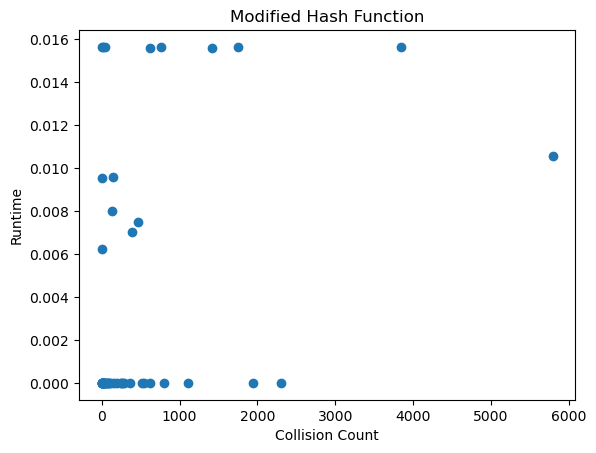

In [10]:
x_list = []
y_list = []

for i in range(1,50):
    random_key = randomKeyValuePairs(10*i)
    table = HashTableModified(500, simp_mult)
    for item in random_key:
        table.put(item[0], item[1])
        

    x_i = table.get_colli_count()
    x_list.append(x_i)
    
        
    start_time = time.time()
    retrieveManyPairs(table)
    end_time = time.time()
    y_i = end_time - start_time
    y_list.append(y_i)


plot.scatter(x_list, y_list)
plot.title("Modified Hash Function")
plot.xlabel("Collision Count")
plot.ylabel("Runtime")
plot.show()

In [ ]:
# By changing my hash function to multiplicative, I got much worse results than when 
# I used a mod function. I think it shows that mod hashing works faster than
# multiplicative hashing, at least for the formula I used. From the first graph is can 
# be inferred that the greater the amount of collisions, the greater the runtime for a 
# hash function. 